In [1]:
import numpy as np

In [2]:
from pydbm.nn.neural_network import NeuralNetwork
from pydbm.nn.nn_layer import NNLayer as NNLayer1
from pydbm.nn.nn_layer import NNLayer as NNLayer2
from pydbm.nn.nn_layer import NNLayer as NNLayer3
from pydbm.nn.nn_layer import NNLayer as NNLayer4
from pydbm.nn.nn_layer import NNLayer as NNLayer5
from pydbm.nn.nn_layer import NNLayer as NNLayer6
from pydbm.nn.nn_layer import NNLayer as NNLayer7

In [3]:
from pydbm.activation.relu_function import ReLuFunction
from pydbm.activation.tanh_function import TanhFunction
from pydbm.activation.logistic_function import LogisticFunction
from pydbm.loss.mean_squared_error import MeanSquaredError
from pydbm.optimization.optparams.adam import Adam

In [4]:
from pydbm.synapse.nn_graph import NNGraph as NNGraph1
from pydbm.synapse.nn_graph import NNGraph as NNGraph2
from pydbm.synapse.nn_graph import NNGraph as NNGraph3
from pydbm.synapse.nn_graph import NNGraph as NNGraph4
from pydbm.synapse.nn_graph import NNGraph as NNGraph5
from pydbm.synapse.nn_graph import NNGraph as NNGraph6
from pydbm.synapse.nn_graph import NNGraph as NNGraph7

In [5]:
from pydbm.verification.verificate_function_approximation import VerificateFunctionApproximation

In [6]:
from logging import getLogger, StreamHandler, NullHandler, DEBUG, ERROR

logger = getLogger("pydbm")
handler = StreamHandler()
handler.setLevel(DEBUG)
logger.setLevel(DEBUG)
logger.addHandler(handler)

In [7]:
epochs = 1000
batch_size = 100
dimension = 100
dimension2 = 500
scale = 0.01

In [8]:
nn_layer1 = NNLayer1(
    NNGraph1(
        activation_function=LogisticFunction(),
        hidden_neuron_count=dimension,
        output_neuron_count=dimension,
        scale=scale,
    )
)
nn_layer2 = NNLayer2(
    NNGraph2(
        activation_function=LogisticFunction(),
        hidden_neuron_count=dimension2,
        output_neuron_count=dimension,
        scale=scale,
    )
)
nn_layer3 = NNLayer3(
    NNGraph3(
        activation_function=LogisticFunction(),
        hidden_neuron_count=dimension,
        output_neuron_count=dimension,
        scale=scale,
    )
)
nn_layer4 = NNLayer4(
    NNGraph4(
        activation_function=LogisticFunction(),
        hidden_neuron_count=dimension,
        output_neuron_count=dimension,
        scale=scale,
    )
)
nn_layer5 = NNLayer5(
    NNGraph5(
        activation_function=LogisticFunction(),
        hidden_neuron_count=dimension,
        output_neuron_count=dimension,
        scale=scale,
    )
)
nn_layer6 = NNLayer6(
    NNGraph6(
        activation_function=LogisticFunction(),
        hidden_neuron_count=dimension,
        output_neuron_count=dimension,
        scale=scale,
    )
)

nn_layer7 = NNLayer7(
    NNGraph7(
        activation_function=LogisticFunction(),
        hidden_neuron_count=dimension,
        output_neuron_count=dimension,
        scale=scale,
    )
)

opt_params = Adam()
opt_params.weight_limit = 0.5
opt_params.dropout_rate = 0.0

nn = NeuralNetwork(
    nn_layer_list=[
        nn_layer1, 
    ],
    epochs=epochs,
    batch_size=batch_size,
    learning_rate=1e-15,
    learning_attenuate_rate=0.1,
    attenuate_epoch=50,
    computable_loss=MeanSquaredError(grad_clip_threshold=10.0),
    opt_params=opt_params,
    verificatable_result=VerificateFunctionApproximation(),
    test_size_rate=0.3,
    tol=1e-15
)


Setup NN layers and the parameters.


In [9]:
observed_arr = np.random.normal(loc=0.0, scale=1.0, size=(1000, dimension))
observed_arr = (observed_arr - observed_arr.min()) / (observed_arr.max() - observed_arr.min())

In [10]:
nn.learn(observed_arr=observed_arr, target_arr=observed_arr)

NN starts learning.
Best params are updated.
Epoch: 1
Loss: 
Training: 4.490551252648391e-06 Test: 4.426635095269675e-06
Epoch: 2
Loss: 
Training: 4.677986964112271e-06 Test: 4.362709729973079e-06
Best params are updated.
Epoch: 3
Loss: 
Training: 4.441482398228462e-06 Test: 4.463023259741073e-06
Epoch: 4
Loss: 
Training: 4.511144999435682e-06 Test: 4.322607153596078e-06
Best params are updated.
Epoch: 5
Loss: 
Training: 4.431879966078373e-06 Test: 4.411916749446522e-06
Epoch: 6
Loss: 
Training: 4.520064743596e-06 Test: 4.600078506735519e-06
Best params are updated.
Epoch: 7
Loss: 
Training: 4.4092931783165446e-06 Test: 4.3703654338645386e-06
Epoch: 8
Loss: 
Training: 4.474088995545358e-06 Test: 4.377600695717998e-06
Epoch: 9
Loss: 
Training: 4.4552591637550245e-06 Test: 4.698293620702107e-06
Epoch: 10
Loss: 
Training: 4.471301914232039e-06 Test: 4.499927437293216e-06
Best params are updated.
Epoch: 11
Loss: 
Training: 4.399262789527298e-06 Test: 4.568687684160578e-06
Rolling mean of L

Training: 4.5356464738394975e-06 Test: 4.365092174206677e-06
Rolling mean of Loss (Window is 10): 
Training: 4.432369875131997e-06 Test: 4.520827122058949e-06
Epoch: 53
Loss: 
Training: 4.537139670434726e-06 Test: 4.6130494144345e-06
Rolling mean of Loss (Window is 10): 
Training: 4.4446871007917244e-06 Test: 4.49752708120134e-06
Epoch: 54
Loss: 
Training: 4.451624411350799e-06 Test: 4.583385989363707e-06
Rolling mean of Loss (Window is 10): 
Training: 4.4540389723113375e-06 Test: 4.523536620781442e-06
Epoch: 55
Loss: 
Training: 4.405585349565672e-06 Test: 4.645199080311712e-06
Rolling mean of Loss (Window is 10): 
Training: 4.457282038201676e-06 Test: 4.5146903791469925e-06
Epoch: 56
Loss: 
Training: 4.5176553228563125e-06 Test: 4.379776151455268e-06
Rolling mean of Loss (Window is 10): 
Training: 4.459528361743737e-06 Test: 4.518305713139464e-06
Epoch: 57
Loss: 
Training: 4.545549523038025e-06 Test: 4.440015093570456e-06
Rolling mean of Loss (Window is 10): 
Training: 4.4574012857156

Epoch: 99
Loss: 
Training: 4.539197700200509e-06 Test: 4.669789170556817e-06
Rolling mean of Loss (Window is 10): 
Training: 4.492066768431323e-06 Test: 4.530528626051514e-06
Epoch: 100
Loss: 
Training: 4.460485108560032e-06 Test: 4.638361371391235e-06
Rolling mean of Loss (Window is 10): 
Training: 4.505425947708709e-06 Test: 4.529006169809243e-06
Epoch: 101
Loss: 
Training: 4.389522174772192e-06 Test: 4.33215965137462e-06
Rolling mean of Loss (Window is 10): 
Training: 4.502497638604074e-06 Test: 4.545795949228876e-06
Epoch: 102
Loss: 
Training: 4.367317187347486e-06 Test: 4.565001264395942e-06
Rolling mean of Loss (Window is 10): 
Training: 4.4822229174287775e-06 Test: 4.505417053849443e-06
Epoch: 103
Loss: 
Training: 4.411119071376298e-06 Test: 4.39842920276346e-06
Rolling mean of Loss (Window is 10): 
Training: 4.466913288754239e-06 Test: 4.508273822445673e-06
Epoch: 104
Loss: 
Training: 4.311025621505049e-06 Test: 4.583702028869678e-06
Rolling mean of Loss (Window is 10): 
Traini

Rolling mean of Loss (Window is 10): 
Training: 4.465478975590666e-06 Test: 4.4579514448546545e-06
Epoch: 146
Loss: 
Training: 4.525159903830296e-06 Test: 4.585345401493398e-06
Rolling mean of Loss (Window is 10): 
Training: 4.47827210770659e-06 Test: 4.455045464331713e-06
Epoch: 147
Loss: 
Training: 4.444471716784022e-06 Test: 4.681992455607189e-06
Rolling mean of Loss (Window is 10): 
Training: 4.485935805058472e-06 Test: 4.479330066887974e-06
Epoch: 148
Loss: 
Training: 4.515767612736509e-06 Test: 4.470866571245092e-06
Rolling mean of Loss (Window is 10): 
Training: 4.480317552606305e-06 Test: 4.493762109968819e-06
Epoch: 149
Loss: 
Training: 4.462647079775753e-06 Test: 4.424942966601857e-06
Rolling mean of Loss (Window is 10): 
Training: 4.467447744916203e-06 Test: 4.501865618417364e-06
Epoch: 150
Loss: 
Training: 4.432154160264128e-06 Test: 4.7076179614467166e-06
Rolling mean of Loss (Window is 10): 
Training: 4.467840744951163e-06 Test: 4.510795794530903e-06
Epoch: 151
Loss: 
Tra

Epoch: 192
Loss: 
Training: 4.353642497871498e-06 Test: 4.544655794298792e-06
Rolling mean of Loss (Window is 10): 
Training: 4.416715522417755e-06 Test: 4.462979681950423e-06
Epoch: 193
Loss: 
Training: 4.448948351385253e-06 Test: 4.380426499810059e-06
Rolling mean of Loss (Window is 10): 
Training: 4.413014820973985e-06 Test: 4.472434327072628e-06
Epoch: 194
Loss: 
Training: 4.471167133720715e-06 Test: 4.480105453354724e-06
Rolling mean of Loss (Window is 10): 
Training: 4.411181281991739e-06 Test: 4.457284953196949e-06
Epoch: 195
Loss: 
Training: 4.4069946529008975e-06 Test: 4.558116099037184e-06
Rolling mean of Loss (Window is 10): 
Training: 4.415332119300055e-06 Test: 4.464766404363834e-06
Epoch: 196
Loss: 
Training: 4.532326483704367e-06 Test: 4.264388908531666e-06
Rolling mean of Loss (Window is 10): 
Training: 4.41528647026169e-06 Test: 4.4666891246731946e-06
Epoch: 197
Loss: 
Training: 4.446419437439904e-06 Test: 4.584213743871433e-06
Rolling mean of Loss (Window is 10): 
Tra

Training: 4.457340682894929e-06 Test: 4.5453583794760076e-06
Epoch: 239
Loss: 
Training: 4.558599499516422e-06 Test: 4.453192030329231e-06
Rolling mean of Loss (Window is 10): 
Training: 4.450671984867649e-06 Test: 4.537687697823896e-06
Epoch: 240
Loss: 
Training: 4.384939688088834e-06 Test: 4.704212197335253e-06
Rolling mean of Loss (Window is 10): 
Training: 4.452621782906815e-06 Test: 4.51756694966895e-06
Epoch: 241
Loss: 
Training: 4.453851606516538e-06 Test: 4.521427258807592e-06
Rolling mean of Loss (Window is 10): 
Training: 4.44747541765431e-06 Test: 4.545068478854517e-06
Epoch: 242
Loss: 
Training: 4.363200488340256e-06 Test: 4.5071403760013116e-06
Rolling mean of Loss (Window is 10): 
Training: 4.455071719157893e-06 Test: 4.564505875824925e-06
Epoch: 243
Loss: 
Training: 4.527645382353561e-06 Test: 4.586459827244153e-06
Rolling mean of Loss (Window is 10): 
Training: 4.452251815263156e-06 Test: 4.549247617674635e-06
Epoch: 244
Loss: 
Training: 4.484170007166908e-06 Test: 4.59

Rolling mean of Loss (Window is 10): 
Training: 4.45522596758829e-06 Test: 4.4885267000662974e-06
Epoch: 286
Loss: 
Training: 4.422375663837299e-06 Test: 4.323567992716863e-06
Rolling mean of Loss (Window is 10): 
Training: 4.449275900386479e-06 Test: 4.485818996056876e-06
Epoch: 287
Loss: 
Training: 4.403334646746893e-06 Test: 4.684828648538754e-06
Rolling mean of Loss (Window is 10): 
Training: 4.448434046176138e-06 Test: 4.454496698924144e-06
Epoch: 288
Loss: 
Training: 4.463316787215006e-06 Test: 4.4299762584645535e-06
Rolling mean of Loss (Window is 10): 
Training: 4.45250240098991e-06 Test: 4.480596339424043e-06
Epoch: 289
Loss: 
Training: 4.502295084256001e-06 Test: 4.716198996169275e-06
Rolling mean of Loss (Window is 10): 
Training: 4.450777067773454e-06 Test: 4.489967531905886e-06
Epoch: 290
Loss: 
Training: 4.481849808045234e-06 Test: 4.591895440157667e-06
Rolling mean of Loss (Window is 10): 
Training: 4.449585440654284e-06 Test: 4.524373578899872e-06
Epoch: 291
Loss: 
Trai

Epoch: 332
Loss: 
Training: 4.454596688444413e-06 Test: 4.407482452138571e-06
Rolling mean of Loss (Window is 10): 
Training: 4.4909338246852e-06 Test: 4.455091958761416e-06
Epoch: 333
Loss: 
Training: 4.426395905484487e-06 Test: 4.52884185566639e-06
Rolling mean of Loss (Window is 10): 
Training: 4.500615949568801e-06 Test: 4.444005501936744e-06
Epoch: 334
Loss: 
Training: 4.475771579788906e-06 Test: 4.531729528465707e-06
Rolling mean of Loss (Window is 10): 
Training: 4.490420571934837e-06 Test: 4.465029215722944e-06
Epoch: 335
Loss: 
Training: 4.4216568560203675e-06 Test: 4.592698131498449e-06
Rolling mean of Loss (Window is 10): 
Training: 4.4773793314063905e-06 Test: 4.464905741898188e-06
Epoch: 336
Loss: 
Training: 4.4664430439117265e-06 Test: 4.5971729089747615e-06
Rolling mean of Loss (Window is 10): 
Training: 4.473412022535057e-06 Test: 4.485005930946143e-06
Epoch: 337
Loss: 
Training: 4.417591125487815e-06 Test: 4.53479137912031e-06
Rolling mean of Loss (Window is 10): 
Trai

Training: 4.444509604763375e-06 Test: 4.4661521111896635e-06
Epoch: 379
Loss: 
Training: 4.312363992079413e-06 Test: 4.3976044447145024e-06
Rolling mean of Loss (Window is 10): 
Training: 4.435546710713171e-06 Test: 4.462795384683598e-06
Epoch: 380
Loss: 
Training: 4.482060931005545e-06 Test: 4.525689782137347e-06
Rolling mean of Loss (Window is 10): 
Training: 4.421375043211265e-06 Test: 4.4616528126678435e-06
Epoch: 381
Loss: 
Training: 4.575146196756933e-06 Test: 4.665363194057665e-06
Rolling mean of Loss (Window is 10): 
Training: 4.422877778890783e-06 Test: 4.475357822311768e-06
Epoch: 382
Loss: 
Training: 4.429198456854585e-06 Test: 4.5611643167913916e-06
Rolling mean of Loss (Window is 10): 
Training: 4.4313680365865815e-06 Test: 4.503963712150618e-06
Epoch: 383
Loss: 
Training: 4.424742795407421e-06 Test: 4.541942997616158e-06
Rolling mean of Loss (Window is 10): 
Training: 4.422734687785848e-06 Test: 4.500272704033844e-06
Epoch: 384
Loss: 
Training: 4.494342138303776e-06 Test:

Rolling mean of Loss (Window is 10): 
Training: 4.525007055125781e-06 Test: 4.445583414873372e-06
Epoch: 426
Loss: 
Training: 4.4929651995293936e-06 Test: 4.375413944541588e-06
Rolling mean of Loss (Window is 10): 
Training: 4.548467402246549e-06 Test: 4.464364333559791e-06
Epoch: 427
Loss: 
Training: 4.576660071777799e-06 Test: 4.797965469653356e-06
Rolling mean of Loss (Window is 10): 
Training: 4.5449104851144665e-06 Test: 4.466348390273444e-06
Epoch: 428
Loss: 
Training: 4.428517109999496e-06 Test: 4.316687987480685e-06
Rolling mean of Loss (Window is 10): 
Training: 4.5489630635680825e-06 Test: 4.48947229480043e-06
Epoch: 429
Loss: 
Training: 4.382164450689988e-06 Test: 4.424449938135542e-06
Rolling mean of Loss (Window is 10): 
Training: 4.549003405727325e-06 Test: 4.468117951855828e-06
Epoch: 430
Loss: 
Training: 4.480475793349168e-06 Test: 4.489664170337558e-06
Rolling mean of Loss (Window is 10): 
Training: 4.545249930659149e-06 Test: 4.449966683749239e-06
Epoch: 431
Loss: 
Tr

Epoch: 472
Loss: 
Training: 4.407106743357731e-06 Test: 4.489131104820749e-06
Rolling mean of Loss (Window is 10): 
Training: 4.504902065570425e-06 Test: 4.5617029194013284e-06
Epoch: 473
Loss: 
Training: 4.6305691218076615e-06 Test: 4.713439200140321e-06
Rolling mean of Loss (Window is 10): 
Training: 4.4855563713496706e-06 Test: 4.550693175741815e-06
Epoch: 474
Loss: 
Training: 4.486319738399212e-06 Test: 4.542962826433621e-06
Rolling mean of Loss (Window is 10): 
Training: 4.487328184277807e-06 Test: 4.561778597223059e-06
Epoch: 475
Loss: 
Training: 1.3915040602204326e-05 Test: 4.5656719589632995e-06
Rolling mean of Loss (Window is 10): 
Training: 4.488543764034331e-06 Test: 4.5618608635140045e-06
Epoch: 476
Loss: 
Training: 4.505405920800677e-06 Test: 4.682242861313365e-06
Rolling mean of Loss (Window is 10): 
Training: 5.4345839301738675e-06 Test: 4.573929119180209e-06
Epoch: 477
Loss: 
Training: 4.587734722159833e-06 Test: 4.555811543617841e-06
Rolling mean of Loss (Window is 10)

Rolling mean of Loss (Window is 10): 
Training: 4.312995515763033e-06 Test: 4.398159460953226e-06
Epoch: 519
Loss: 
Training: 4.133939767507285e-06 Test: 4.067381611449535e-06
Rolling mean of Loss (Window is 10): 
Training: 4.2901856334322205e-06 Test: 4.395262636736279e-06
Epoch: 520
Loss: 
Training: 4.155955613817966e-06 Test: 4.362747320805625e-06
Rolling mean of Loss (Window is 10): 
Training: 4.251248052889323e-06 Test: 4.3375115180385045e-06
Best params are updated.
Epoch: 521
Loss: 
Training: 4.06007176006633e-06 Test: 4.026920497353419e-06
Rolling mean of Loss (Window is 10): 
Training: 4.235080987877225e-06 Test: 4.33654835422857e-06
Epoch: 522
Loss: 
Training: 4.106739089590377e-06 Test: 4.365498976781278e-06
Rolling mean of Loss (Window is 10): 
Training: 4.2133926960026994e-06 Test: 4.3008028047885224e-06
Epoch: 523
Loss: 
Training: 4.067873788559539e-06 Test: 4.003479722963681e-06
Rolling mean of Loss (Window is 10): 
Training: 4.180018274107431e-06 Test: 4.283073428025236

Training: 3.171542225694352e-06 Test: 3.284030551359887e-06
Epoch: 563
Loss: 
Training: 3.1422213689774923e-06 Test: 3.1893327696814044e-06
Rolling mean of Loss (Window is 10): 
Training: 3.1614168428100805e-06 Test: 3.2680669548639663e-06
Epoch: 564
Loss: 
Training: 3.2236890210775853e-06 Test: 2.94673321705543e-06
Rolling mean of Loss (Window is 10): 
Training: 3.1634160420337242e-06 Test: 3.2875443573464133e-06
Epoch: 565
Loss: 
Training: 3.193810623174498e-06 Test: 3.0104192763466644e-06
Rolling mean of Loss (Window is 10): 
Training: 3.1692751434018744e-06 Test: 3.2541584878954595e-06
Best params are updated.
Epoch: 566
Loss: 
Training: 3.0094167202249224e-06 Test: 3.152286706611502e-06
Rolling mean of Loss (Window is 10): 
Training: 3.1536868254734914e-06 Test: 3.216863190146737e-06
Epoch: 567
Loss: 
Training: 3.1858505293198433e-06 Test: 2.945725652320979e-06
Rolling mean of Loss (Window is 10): 
Training: 3.1406055214708013e-06 Test: 3.2156077840568508e-06
Best params are updat

Rolling mean of Loss (Window is 10): 
Training: 4.411982189561918e-06 Test: 4.799752984064676e-06
Epoch: 608
Loss: 
Training: 5.372798179995582e-06 Test: 5.5373598494538005e-06
Rolling mean of Loss (Window is 10): 
Training: 4.6593898810632715e-06 Test: 5.0295827239530935e-06
Epoch: 609
Loss: 
Training: 5.840472182691893e-06 Test: 5.5559401636132634e-06
Rolling mean of Loss (Window is 10): 
Training: 4.8900550410782276e-06 Test: 5.284258786006544e-06
Epoch: 610
Loss: 
Training: 5.357042034530082e-06 Test: 5.447691950031621e-06
Rolling mean of Loss (Window is 10): 
Training: 5.201412632061574e-06 Test: 5.5424743441013585e-06
Epoch: 611
Loss: 
Training: 5.192859819883158e-06 Test: 5.354911840307703e-06
Rolling mean of Loss (Window is 10): 
Training: 5.442998761885131e-06 Test: 5.679185659578284e-06
Epoch: 612
Loss: 
Training: 5.141785647353691e-06 Test: 5.024733932908908e-06
Rolling mean of Loss (Window is 10): 
Training: 5.570205047118563e-06 Test: 5.637408025027077e-06
Epoch: 613
Loss:

Training: 5.912030704917272e-06 Test: 5.977777969251861e-06
Epoch: 654
Loss: 
Training: 5.327473632109008e-06 Test: 4.998963042306663e-06
Rolling mean of Loss (Window is 10): 
Training: 5.951103871433864e-06 Test: 5.940847039535441e-06
Epoch: 655
Loss: 
Training: 4.728002648135653e-06 Test: 5.032975300485247e-06
Rolling mean of Loss (Window is 10): 
Training: 5.912146048134935e-06 Test: 5.864284425388904e-06
Epoch: 656
Loss: 
Training: 4.870519011979115e-06 Test: 5.498046117329559e-06
Rolling mean of Loss (Window is 10): 
Training: 5.811791269781419e-06 Test: 5.765234644195328e-06
Epoch: 657
Loss: 
Training: 5.441454082187052e-06 Test: 5.8631048515810245e-06
Rolling mean of Loss (Window is 10): 
Training: 5.719165903401344e-06 Test: 5.728365877793245e-06
Epoch: 658
Loss: 
Training: 5.659994481443542e-06 Test: 6.496232574111755e-06
Rolling mean of Loss (Window is 10): 
Training: 5.68120495708781e-06 Test: 5.72257254712053e-06
Epoch: 659
Loss: 
Training: 6.269088142575321e-06 Test: 6.701

Rolling mean of Loss (Window is 10): 
Training: 6.293834524516828e-06 Test: 6.330830021062933e-06
Epoch: 701
Loss: 
Training: 4.292520517210971e-06 Test: 5.828066330300066e-06
Rolling mean of Loss (Window is 10): 
Training: 6.267324342263524e-06 Test: 6.130954080053412e-06
Epoch: 702
Loss: 
Training: 5.981142928555441e-06 Test: 4.983263273797677e-06
Rolling mean of Loss (Window is 10): 
Training: 6.061551230410782e-06 Test: 6.0473502392500114e-06
Epoch: 703
Loss: 
Training: 4.987249084374095e-06 Test: 5.099502891391494e-06
Rolling mean of Loss (Window is 10): 
Training: 6.001403416640957e-06 Test: 5.884017995086095e-06
Epoch: 704
Loss: 
Training: 4.81060241949755e-06 Test: 4.9923755379206955e-06
Rolling mean of Loss (Window is 10): 
Training: 5.856453466718648e-06 Test: 5.769124028136273e-06
Epoch: 705
Loss: 
Training: 4.9168310796818715e-06 Test: 5.168340079534418e-06
Rolling mean of Loss (Window is 10): 
Training: 5.721267504377929e-06 Test: 5.6353058521522005e-06
Epoch: 706
Loss: 
T

Epoch: 747
Loss: 
Training: 5.439740542415773e-06 Test: 5.861172860217199e-06
Rolling mean of Loss (Window is 10): 
Training: 4.223758022445008e-06 Test: 4.459885157442753e-06
Epoch: 748
Loss: 
Training: 5.8997533860127545e-06 Test: 5.925726085975268e-06
Rolling mean of Loss (Window is 10): 
Training: 4.411272951606461e-06 Test: 4.701382434458409e-06
Epoch: 749
Loss: 
Training: 6.106334507980179e-06 Test: 6.0460404798487975e-06
Rolling mean of Loss (Window is 10): 
Training: 4.6697399375363056e-06 Test: 4.963373540875755e-06
Epoch: 750
Loss: 
Training: 6.176353307459571e-06 Test: 7.478490857931044e-06
Rolling mean of Loss (Window is 10): 
Training: 4.954961093545209e-06 Test: 5.227501784940202e-06
Epoch: 751
Loss: 
Training: 7.343773776007627e-06 Test: 6.601402557804696e-06
Rolling mean of Loss (Window is 10): 
Training: 5.236295527730492e-06 Test: 5.60765904085384e-06
Epoch: 752
Loss: 
Training: 6.713622283972051e-06 Test: 6.234493699880593e-06
Rolling mean of Loss (Window is 10): 
Tr

Rolling mean of Loss (Window is 10): 
Training: 2.792565930858942e-06 Test: 2.9826538081135553e-06
Epoch: 794
Loss: 
Training: 2.4004556044296287e-06 Test: 3.5777713311540627e-06
Rolling mean of Loss (Window is 10): 
Training: 2.8428604861373413e-06 Test: 3.0476978026557622e-06
Epoch: 795
Loss: 
Training: 3.0459479965052924e-06 Test: 3.1386120862274532e-06
Rolling mean of Loss (Window is 10): 
Training: 2.7991509440624197e-06 Test: 3.0772408800659877e-06
Epoch: 796
Loss: 
Training: 2.9935205727063407e-06 Test: 2.817516045258239e-06
Rolling mean of Loss (Window is 10): 
Training: 2.8006637187539474e-06 Test: 3.1034449987645054e-06
Epoch: 797
Loss: 
Training: 2.3337295789239115e-06 Test: 3.4686110740961334e-06
Rolling mean of Loss (Window is 10): 
Training: 2.83125283255368e-06 Test: 3.109302430750461e-06
Epoch: 798
Loss: 
Training: 3.021724078251379e-06 Test: 3.021614645831078e-06
Rolling mean of Loss (Window is 10): 
Training: 2.7425748745158104e-06 Test: 3.0932303135906636e-06
Epoch: 

Training: 3.1682353342107385e-06 Test: 3.6424835724294758e-06
Epoch: 840
Loss: 
Training: 3.3798652611013586e-06 Test: 3.655085768180083e-06
Rolling mean of Loss (Window is 10): 
Training: 3.1262822522769866e-06 Test: 3.6539801791940983e-06
Epoch: 841
Loss: 
Training: 3.461171833913151e-06 Test: 4.368808762047755e-06
Rolling mean of Loss (Window is 10): 
Training: 3.1544401428335634e-06 Test: 3.6185193078910994e-06
Epoch: 842
Loss: 
Training: 3.466680803047707e-06 Test: 3.6402768869957316e-06
Rolling mean of Loss (Window is 10): 
Training: 3.2341289348398508e-06 Test: 3.678858789886895e-06
Epoch: 843
Loss: 
Training: 3.804522341827471e-06 Test: 3.454782037137584e-06
Rolling mean of Loss (Window is 10): 
Training: 3.2242822966803986e-06 Test: 3.660582482906805e-06
Epoch: 844
Loss: 
Training: 3.3288363858429383e-06 Test: 4.34250341687715e-06
Rolling mean of Loss (Window is 10): 
Training: 3.2805363058465714e-06 Test: 3.7124972162004047e-06
Epoch: 845
Loss: 
Training: 4.609287385938353e-0

Epoch: 886
Loss: 
Training: 3.691411065647375e-06 Test: 3.6664500104879885e-06
Rolling mean of Loss (Window is 10): 
Training: 3.111005278658054e-06 Test: 3.479700441130368e-06
Epoch: 887
Loss: 
Training: 3.842093419871995e-06 Test: 3.3183770303432997e-06
Rolling mean of Loss (Window is 10): 
Training: 3.1753759193591146e-06 Test: 3.5295001304183725e-06
Epoch: 888
Loss: 
Training: 3.425599280105089e-06 Test: 3.206423477575055e-06
Rolling mean of Loss (Window is 10): 
Training: 3.2388614818229043e-06 Test: 3.551778798933934e-06
Epoch: 889
Loss: 
Training: 3.564697349183846e-06 Test: 4.3589360254709245e-06
Rolling mean of Loss (Window is 10): 
Training: 3.263211832862295e-06 Test: 3.5069752780782823e-06
Epoch: 890
Loss: 
Training: 3.5752204927490074e-06 Test: 3.2696270497005257e-06
Rolling mean of Loss (Window is 10): 
Training: 3.327698592740114e-06 Test: 3.663398262136815e-06
Epoch: 891
Loss: 
Training: 3.5557956292607994e-06 Test: 3.930970773104717e-06
Rolling mean of Loss (Window is 

Rolling mean of Loss (Window is 10): 
Training: 2.9611389364385836e-06 Test: 3.1856520985288327e-06
Epoch: 933
Loss: 
Training: 2.7052821169515666e-06 Test: 3.6758509571463856e-06
Rolling mean of Loss (Window is 10): 
Training: 2.9410427502528264e-06 Test: 3.2276515651668113e-06
Epoch: 934
Loss: 
Training: 3.1366074364503298e-06 Test: 3.221864189526012e-06
Rolling mean of Loss (Window is 10): 
Training: 2.9370275985319536e-06 Test: 3.3039276474173254e-06
Epoch: 935
Loss: 
Training: 3.724273744135182e-06 Test: 3.1441250150780807e-06
Rolling mean of Loss (Window is 10): 
Training: 2.9505408271428487e-06 Test: 3.2983872515070886e-06
Epoch: 936
Loss: 
Training: 3.4820515249261962e-06 Test: 4.321712497858856e-06
Rolling mean of Loss (Window is 10): 
Training: 3.0292248270283948e-06 Test: 3.3112694142068177e-06
Epoch: 937
Loss: 
Training: 3.207867590488007e-06 Test: 3.1850723490272793e-06
Rolling mean of Loss (Window is 10): 
Training: 3.1157500703026307e-06 Test: 3.4359806338868818e-06
Epoc

Training: 3.4217423863487836e-06 Test: 3.5642992152863193e-06
Epoch: 979
Loss: 
Training: 2.7846577629986566e-06 Test: 3.113207386170507e-06
Rolling mean of Loss (Window is 10): 
Training: 3.359483749488493e-06 Test: 3.5246992604961387e-06
Epoch: 980
Loss: 
Training: 3.1348169001915255e-06 Test: 3.5491785661250003e-06
Rolling mean of Loss (Window is 10): 
Training: 3.358669055936899e-06 Test: 3.518035793339617e-06
Epoch: 981
Loss: 
Training: 3.342831341531973e-06 Test: 3.044902211658249e-06
Rolling mean of Loss (Window is 10): 
Training: 3.369314535899199e-06 Test: 3.466929407349504e-06
Epoch: 982
Loss: 
Training: 4.1389917542732436e-06 Test: 4.014883319572818e-06
Rolling mean of Loss (Window is 10): 
Training: 3.3732792635152677e-06 Test: 3.4179925363370058e-06
Epoch: 983
Loss: 
Training: 3.776841937434318e-06 Test: 3.2819494992060225e-06
Rolling mean of Loss (Window is 10): 
Training: 3.4397097396267656e-06 Test: 3.435759010793973e-06
Epoch: 984
Loss: 
Training: 2.759620952204289e-06

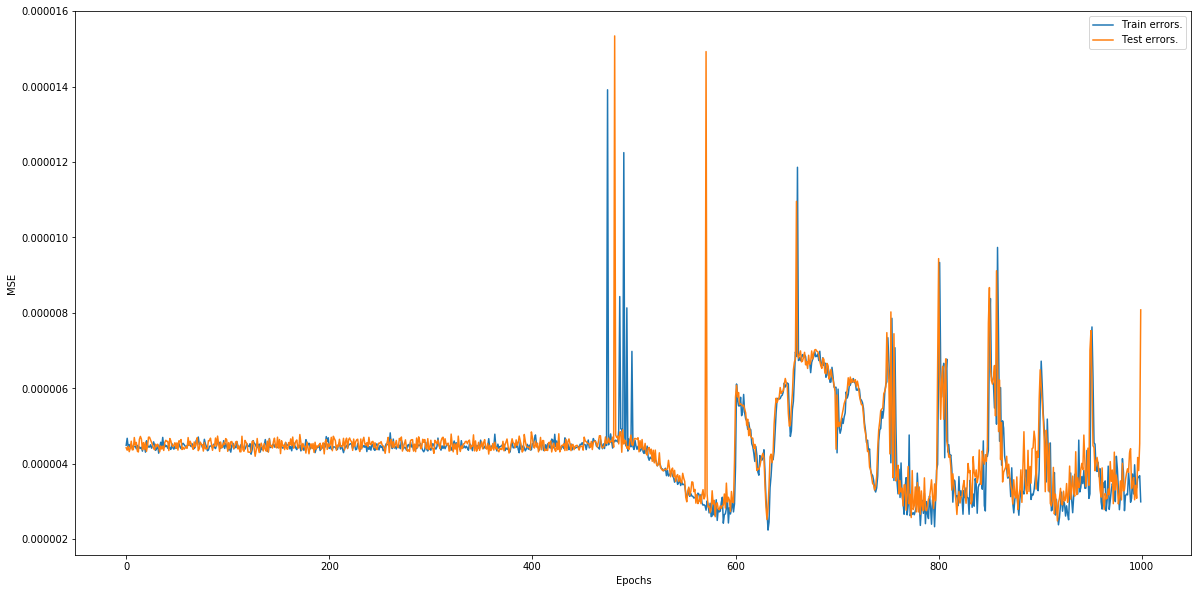

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
_ = plt.figure(figsize=(20, 10))
plt.plot(nn.verificatable_result.logs_df.train_loss.values, label="Train errors.")
plt.plot(nn.verificatable_result.logs_df.test_loss.values, label="Test errors.")
plt.legend()
plt.ylabel("MSE")
plt.xlabel("Epochs")
plt.show()
plt.close()